### 线性二分类
加载自定义数据：

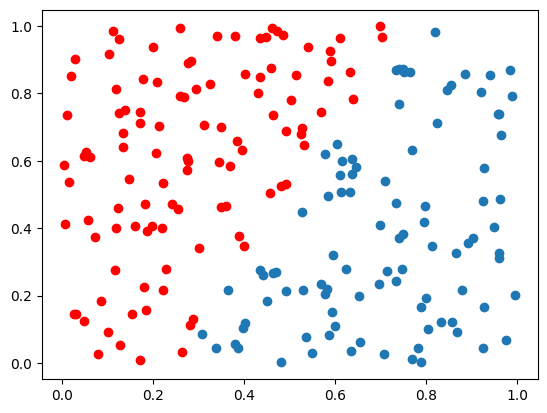

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
data = pd.read_csv("data/myData/data_5d.csv")
RDot = data[data['T']==1]
BDot = data[data['T']==0]
plt.scatter(BDot['X'],BDot['Y'])
plt.scatter(RDot['X'],RDot['Y'],c='r')

In [2]:
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, file):
        self.data = pd.read_csv(file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = torch.tensor(self.data.iloc[idx, 1:3]).float()
        Y = torch.tensor([self.data.iloc[idx, 3]]).float()
        return X, Y


In [3]:
training_data = CustomDataset("data/myData/data_5d.csv")
train_dataloader = DataLoader(training_data, batch_size=20, shuffle=True)

In [4]:
import torch
from torch import nn

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


#### 定义类

单层神经元

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)  # 输入维度为 2，输出维度为 1
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y_pred = self.linear(x)
        y_pred = self.sigmoid(y_pred)
        return y_pred

#### 激活函数
- Sigmoid函数：Sigmoid函数是一种常用的非线性激活函数，其数学形式为$f(x)=\frac{1}{1+e^{-x}}$。它的输出范围在0到1之间，可以用于二分类问题。
- ReLU函数：ReLU函数是一种非线性激活函数，其数学形式为$f(x)=max(0,x)$。它在$x>0$时输出$x$，在$x\leq 0$时输出0。ReLU函数计算速度快，可以加速神经网络的训练过程。
- LeakyReLU函数：LeakyReLU函数是一种改进的ReLU函数，其数学形式为$f(x)=max(ax,x)$，其中$a$是一个小于1的常数。当$x\leq 0$时，LeakyReLU函数会输出一个非零的值，避免了ReLU函数在$x<0$时出现的“神经元死亡”现象。
- Tanh函数：Tanh函数是一种常用的非线性激活函数，其数学形式为$f(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$。它的输出范围在-1到1之间，可以用于多分类问题。
- Softmax函数：Softmax函数是一种常用的激活函数，主要用于多分类问题。其数学形式为$f(x_{i})=\frac{e^{x_{i}}}{\sum_{j=1}^{K}e^{x_{j}}}$，其中$x_{i}$表示第$i$个神经元的输出，$K$表示神经网络的输出层大小。Softmax函数会将所有输出映射到一个概率分布上，保证所有输出的和为1。

#### 损失函数
- nn.MSELoss：均方误差损失函数，用于回归任务。  
- nn.CrossEntropyLoss：交叉熵损失函数，用于多分类任务。  
- nn.BCELoss：二元交叉熵损失函数，用于二分类任务。  
- nn.NLLLoss：负对数似然损失函数，通常用于文本分类任务。  
- nn.KLDivLoss：KL 散度损失函数，用于计算两个概率分布之间的距离。  
- nn.SmoothL1Loss：平滑 L1 损失函数，与均方误差损失函数类似，但对离群值的惩罚更小，适用于回归任务。

In [6]:
#将模型添加到GPU
model = NeuralNetwork().to(device)
# 定义损失函数和优化器
# 二元交叉熵
criterion = torch.nn.BCELoss()
# 随机梯度下降
optimizer = torch.optim.SGD(model.parameters(), lr=0.4)
# model.parameters()用于返回模型中所有可训练的参数

训练模型

In [7]:
num_epochs = 200
loss_arr = []
loss_recode_num = 100
loss_recode = 0
for epoch in range(num_epochs):
        #模型进入训练模式
        model.train()
        #遍历数据
        for batch, (inputs, targets) in enumerate(train_dataloader):
                #将数据添加到GPU
                inputs, targets = inputs.to(device), targets.to(device)
                # 前向传播
                pred = model(inputs)
                # loss计算
                loss = criterion(pred, targets)
                # 梯度清零
                optimizer.zero_grad()
                # 反向传播
                loss.backward()
                # 更新参数的值
                optimizer.step()
                # 输出数据
                print('迭代: [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        loss_arr.append(loss.item())

迭代: [1/200], Loss: 0.7377
迭代: [1/200], Loss: 0.7506
迭代: [1/200], Loss: 0.6503
迭代: [1/200], Loss: 0.8509
迭代: [1/200], Loss: 0.7111
迭代: [1/200], Loss: 0.6906
迭代: [1/200], Loss: 0.6856
迭代: [1/200], Loss: 0.6877
迭代: [1/200], Loss: 0.6886
迭代: [1/200], Loss: 0.7188
迭代: [2/200], Loss: 0.6425
迭代: [2/200], Loss: 0.6410
迭代: [2/200], Loss: 0.6408
迭代: [2/200], Loss: 0.6336
迭代: [2/200], Loss: 0.6865
迭代: [2/200], Loss: 0.6441
迭代: [2/200], Loss: 0.6526
迭代: [2/200], Loss: 0.6144
迭代: [2/200], Loss: 0.6146
迭代: [2/200], Loss: 0.6038
迭代: [3/200], Loss: 0.5829
迭代: [3/200], Loss: 0.6093
迭代: [3/200], Loss: 0.6017
迭代: [3/200], Loss: 0.6089
迭代: [3/200], Loss: 0.5759
迭代: [3/200], Loss: 0.5908
迭代: [3/200], Loss: 0.5936
迭代: [3/200], Loss: 0.5572
迭代: [3/200], Loss: 0.5948
迭代: [3/200], Loss: 0.5707
迭代: [4/200], Loss: 0.5777
迭代: [4/200], Loss: 0.5733
迭代: [4/200], Loss: 0.5821
迭代: [4/200], Loss: 0.5470
迭代: [4/200], Loss: 0.5280
迭代: [4/200], Loss: 0.5276
迭代: [4/200], Loss: 0.5439
迭代: [4/200], Loss: 0.5522
迭代: [4/200],

#### 可视化loss

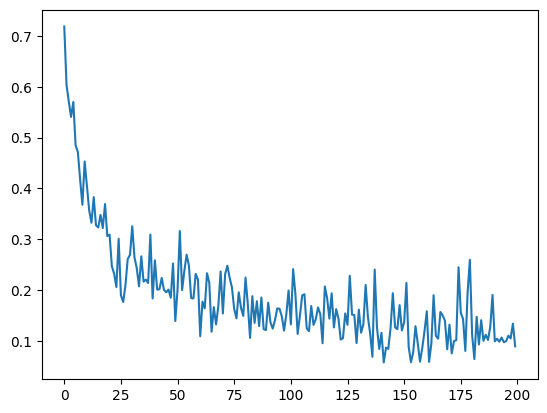

In [8]:
plt.plot(loss_arr)
#plt.ylim(0,0.1)

测试：

In [9]:
import numpy as np
class PredDataset(Dataset):
    def __init__(self):
        self.x = np.random.rand(20)
        self.y = np.random.rand(20)
    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        X = torch.tensor([self.x[idx],self.y[idx]]).float()
        return X
pred_data = PredDataset()
pred_dataloader = DataLoader(pred_data, batch_size=len(pred_data), shuffle=False)

In [10]:
def test(dataloader, model):
    model.eval()
    with torch.no_grad():
        for X in dataloader:
            X = X.to(device)
            pred = model(X)
            return pred
plot_y = test(pred_dataloader,model)

#### 结果可视化

In [11]:
testData = pd.DataFrame({'X':pred_data.x,'Y':pred_data.y,'Z':plot_y.cpu().reshape(-1)})
ODot = testData[testData['Z'] > 0.5]
YDot = testData[testData['Z'] < 0.5]

[Parameter containing:
tensor([[-13.5384,   6.9638]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([3.3116], device='cuda:0', requires_grad=True)]


(0.0, 1.0)

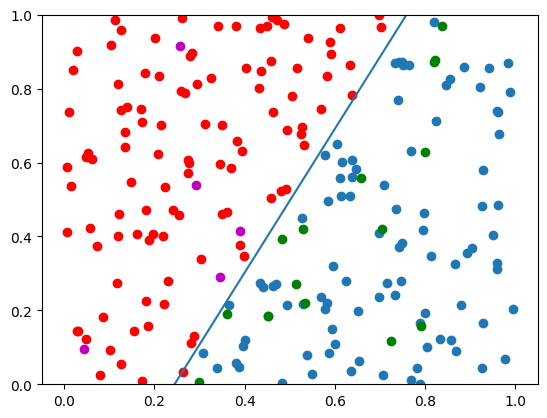

In [24]:
import numpy as np
plt.scatter(BDot['X'],BDot['Y'])
plt.scatter(RDot['X'],RDot['Y'],c='r')
plt.scatter(ODot['X'],ODot['Y'],c='m')
plt.scatter(YDot['X'],YDot['Y'],c='g')
print(list(model.parameters()))
w1 = list(model.parameters())[0][0,0].cpu().detach().numpy()
w2 = list(model.parameters())[0][0,1].cpu().detach().numpy()
b = list(model.parameters())[1][0].cpu().detach().numpy()
x= np.linspace(0,1,10)
y= -x * w1/w2 - b/w2
plt.plot(x,y)
plt.ylim(0,1)